## Summer School on Deep Learning Surathkal, Karnataka - 2019

### Small Unet-Depth1(Augmentation)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
data_dir_list=os.chdir('/content/drive/My Drive/SSDL/Day3/DATA')

In [0]:
import os
import cv2
import numpy as np
PATH = os.getcwd()
data_path = PATH + '/D1'
data_dir_list = os.listdir(data_path)

In [0]:
img_data_list=[]
for dataset in data_dir_list:
    img_list= sorted(os.listdir(data_path+'/'+ dataset))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
    var=0;
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        var=var+1
        if var==20:
          break
print("Loaded_Sccessfully")
data = np.array(img_data_list)
print(data.shape)

Loaded the images of dataset-Data

Loaded_Sccessfully
(20, 128, 128)


In [0]:
PATH1 = os.getcwd()
data_path1 = PATH1 + '/L1'
data_dir_list1 = os.listdir(data_path1)
print(data_dir_list1)

['label']


In [0]:
img_data_list1=[]
for dataset1 in data_dir_list1:
    img_list1=sorted(os.listdir(data_path1+'/'+ dataset1))
    print ('Loaded the images of dataset-'+'{}\n'.format(dataset1))
    var=0;
    for img1 in img_list1:
        input_img1=cv2.imread(data_path1 + '/'+ dataset1 + '/'+ img1 )
        input_img1=cv2.cvtColor(input_img1, cv2.COLOR_BGR2GRAY)
        input_img_resize1=cv2.resize(input_img1,(128,128))
        img_data_list1.append(input_img_resize1)
        var=var+1
        if var==20:
          break
label= np.array(img_data_list1)
print(label.shape)

Loaded the images of dataset-label

(20, 128, 128)


(128, 128)


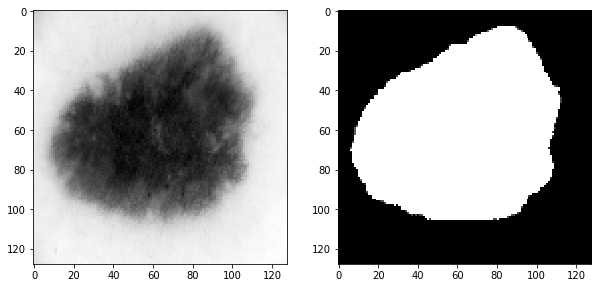

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(data [0],'gray')
plt.subplot(122).imshow(label[0],'gray')
print(data[0].shape)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [0]:
x,y = shuffle(data,label, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [0]:
X_train = np.reshape(X_train,(-1,128,128,1))
y_train = np.reshape(y_train,(-1,128,128,1))

X_train = X_train.astype('float32')/255
y_train = y_train.astype('float32')/255

X_test = np.reshape(X_test,(-1,128,128,1))
y_test = np.reshape(y_test,(-1,128,128,1))

X_test = X_test.astype('float32')/255
y_test = y_test.astype('float32')/255

In [0]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(16, 128, 128, 1)
(16, 128, 128, 1)
(4, 128, 128, 1)
(4, 128, 128, 1)


In [0]:
mean = np.mean(X_train)
std = np.std(X_train)

print(mean)
print(std)

X_train = X_train-mean
X_train = X_train/std

X_test = X_test-mean
X_test = X_test/std

0.5904963
0.1954056


In [1]:
!pip install medpy
from keras.layers import *
import keras
from keras.models import Sequential
import cv2
import os
import matplotlib.pyplot as plt
%matplotlib inline
#from livelossplot.keras import PlotLossesCallback
from medpy.metric import dc, precision, recall
from keras import Model

     |████████████████████████████████| 153kB 2.8MB/s 
     |████████████████████████████████| 42.5MB 913kB/s 
  Stored in directory: /root/.cache/pip/wheels/8c/c9/9c/2c6281c7a72b9fb1570862a4f028af7ce38405008354fbf870
Successfully built medpy


Using TensorFlow backend.


In [3]:
input_layer = Input(shape=(128,128,1))

c1 = Conv2D(8, (3,3),  padding='same')(input_layer)
ba1 = BatchNormalization()(c1)
a1 = Activation('relu')(ba1)
p1 = MaxPooling2D(pool_size=(2,2)) (a1)

c2 = Conv2D(16, (3,3),  padding='same')(p1)
bb1 = BatchNormalization()(c2)
a2 = Activation('relu')(bb1)
p2 = MaxPooling2D(pool_size=(2,2)) (a2)

ct = Conv2DTranspose(16,kernel_size=(2,2),strides=(2,2))(p2)
bc1 = BatchNormalization()(ct)
a5 = Activation('relu')(bc1)
add1 = Add()([bb1,a5])
ct2 = Conv2DTranspose(32,kernel_size=(2,2),strides=(2,2))(add1)
bd1 = BatchNormalization()(ct2)
a3 = Activation('relu')(bd1)
c3 = Conv2D(1, (3,3),  padding='same')(a3)
bd2 = BatchNormalization()(c3)
a4 =  Activation('relu')(bd2)

model = Model(input_layer,a4)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 128, 128, 1)  0                                            
__________________________________________________________________________________________________
conv2d_4 (Conv2D)               (None, 128, 128, 8)  80          input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_6 (BatchNor (None, 128, 128, 8)  32          conv2d_4[0][0]                   
__________________________________________________________________________________________________
activation_6 (Activation)       (None, 128, 128, 8)  0           batch_normalization_6[0][0]      
__________________________________________________________________________________________________
max_poolin

In [0]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(X_train)
b = 32
train_gen = datagen.flow(X_train[:570], y_train[:570], batch_size=b)
val_gen = ImageDataGenerator().flow(X_train[570:], y_train[570:], batch_size=b)

In [0]:
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (K.sum(y_true_f) + K.sum(y_pred_f) + 1)

In [0]:
import math
from keras.callbacks import EarlyStopping,ModelCheckpoint
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
mc = ModelCheckpoint('2small_Unet.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [0]:
optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=True)

In [0]:
model.compile(loss='mse', optimizer=optimizer, metrics=[dice_coef,'accuracy'])

In [0]:
history = model.fit_generator(train_gen,
                              validation_data = val_gen,validation_steps = int(np.ceil(150 / float(b))),
                              callbacks=[es,mc], epochs=500, verbose=2,
                              steps_per_epoch=int(np.ceil(570 / float(b))))

Epoch 1/500
 - 2s - loss: 1.0416 - dice_coef: 0.7542 - acc: 0.4380 - val_loss: 2.5790 - val_dice_coef: 1.3890 - val_acc: 0.2628

Epoch 00001: val_loss improved from inf to 2.57895, saving model to 2small_Unet.h5
Epoch 2/500
 - 1s - loss: 0.9229 - dice_coef: 1.0186 - acc: 0.4202 - val_loss: 1.0123 - val_dice_coef: 1.1800 - val_acc: 0.5153

Epoch 00002: val_loss improved from 2.57895 to 1.01230, saving model to 2small_Unet.h5
Epoch 3/500
 - 1s - loss: 0.8656 - dice_coef: 1.0365 - acc: 0.4267 - val_loss: 0.6686 - val_dice_coef: 1.3926 - val_acc: 0.4067

Epoch 00003: val_loss improved from 1.01230 to 0.66861, saving model to 2small_Unet.h5
Epoch 4/500
 - 1s - loss: 0.8215 - dice_coef: 1.0128 - acc: 0.4412 - val_loss: 0.4991 - val_dice_coef: 1.7589 - val_acc: 0.5299

Epoch 00004: val_loss improved from 0.66861 to 0.49915, saving model to 2small_Unet.h5
Epoch 5/500
 - 1s - loss: 0.7530 - dice_coef: 1.0824 - acc: 0.4543 - val_loss: 0.5677 - val_dice_coef: 0.1701 - val_acc: 0.4358

Epoch 00005


Epoch 00042: val_loss did not improve from 0.16714
Epoch 43/500
 - 1s - loss: 0.1896 - dice_coef: 0.6445 - acc: 0.7829 - val_loss: 0.1537 - val_dice_coef: 0.6400 - val_acc: 0.8132

Epoch 00043: val_loss improved from 0.16714 to 0.15370, saving model to 2small_Unet.h5
Epoch 44/500
 - 1s - loss: 0.1889 - dice_coef: 0.6328 - acc: 0.7812 - val_loss: 0.1683 - val_dice_coef: 0.6688 - val_acc: 0.8014

Epoch 00044: val_loss did not improve from 0.15370
Epoch 45/500
 - 1s - loss: 0.1863 - dice_coef: 0.6257 - acc: 0.7815 - val_loss: 0.1795 - val_dice_coef: 0.6684 - val_acc: 0.7894

Epoch 00045: val_loss did not improve from 0.15370
Epoch 46/500
 - 1s - loss: 0.1797 - dice_coef: 0.6251 - acc: 0.7863 - val_loss: 0.1509 - val_dice_coef: 0.6156 - val_acc: 0.8163

Epoch 00046: val_loss improved from 0.15370 to 0.15091, saving model to 2small_Unet.h5
Epoch 47/500
 - 1s - loss: 0.1789 - dice_coef: 0.6152 - acc: 0.7864 - val_loss: 0.1579 - val_dice_coef: 0.6071 - val_acc: 0.8058

Epoch 00047: val_loss 


Epoch 00085: val_loss did not improve from 0.12919
Epoch 86/500
 - 1s - loss: 0.1444 - dice_coef: 0.4869 - acc: 0.7987 - val_loss: 0.1332 - val_dice_coef: 0.5417 - val_acc: 0.8250

Epoch 00086: val_loss did not improve from 0.12919
Epoch 87/500
 - 1s - loss: 0.1446 - dice_coef: 0.4851 - acc: 0.7976 - val_loss: 0.1296 - val_dice_coef: 0.5526 - val_acc: 0.8198

Epoch 00087: val_loss did not improve from 0.12919
Epoch 88/500
 - 1s - loss: 0.1454 - dice_coef: 0.4820 - acc: 0.7951 - val_loss: 0.1303 - val_dice_coef: 0.5263 - val_acc: 0.8295

Epoch 00088: val_loss did not improve from 0.12919
Epoch 89/500
 - 1s - loss: 0.1436 - dice_coef: 0.4825 - acc: 0.7995 - val_loss: 0.1294 - val_dice_coef: 0.5251 - val_acc: 0.8268

Epoch 00089: val_loss did not improve from 0.12919
Epoch 90/500
 - 1s - loss: 0.1423 - dice_coef: 0.4843 - acc: 0.7993 - val_loss: 0.1365 - val_dice_coef: 0.4910 - val_acc: 0.8262

Epoch 00090: val_loss did not improve from 0.12919
Epoch 91/500
 - 1s - loss: 0.1431 - dice_co


Epoch 00130: val_loss did not improve from 0.12713
Epoch 131/500
 - 1s - loss: 0.1405 - dice_coef: 0.4671 - acc: 0.8026 - val_loss: 0.1279 - val_dice_coef: 0.5125 - val_acc: 0.8257

Epoch 00131: val_loss did not improve from 0.12713
Epoch 132/500
 - 1s - loss: 0.1417 - dice_coef: 0.4616 - acc: 0.7997 - val_loss: 0.1271 - val_dice_coef: 0.5391 - val_acc: 0.8247

Epoch 00132: val_loss improved from 0.12713 to 0.12706, saving model to 2small_Unet.h5
Epoch 133/500
 - 1s - loss: 0.1422 - dice_coef: 0.4627 - acc: 0.7994 - val_loss: 0.1377 - val_dice_coef: 0.4752 - val_acc: 0.8237

Epoch 00133: val_loss did not improve from 0.12706
Epoch 134/500
 - 1s - loss: 0.1417 - dice_coef: 0.4634 - acc: 0.8006 - val_loss: 0.1292 - val_dice_coef: 0.5065 - val_acc: 0.8305

Epoch 00134: val_loss did not improve from 0.12706
Epoch 135/500
 - 1s - loss: 0.1394 - dice_coef: 0.4676 - acc: 0.8050 - val_loss: 0.1298 - val_dice_coef: 0.4859 - val_acc: 0.8230

Epoch 00135: val_loss did not improve from 0.12706
Ep


Epoch 00175: val_loss did not improve from 0.12517
Epoch 176/500
 - 1s - loss: 0.1391 - dice_coef: 0.4665 - acc: 0.8049 - val_loss: 0.1304 - val_dice_coef: 0.5048 - val_acc: 0.8279

Epoch 00176: val_loss did not improve from 0.12517
Epoch 177/500
 - 1s - loss: 0.1401 - dice_coef: 0.4649 - acc: 0.8017 - val_loss: 0.1255 - val_dice_coef: 0.5054 - val_acc: 0.8285

Epoch 00177: val_loss did not improve from 0.12517
Epoch 178/500
 - 1s - loss: 0.1408 - dice_coef: 0.4631 - acc: 0.8012 - val_loss: 0.1288 - val_dice_coef: 0.5296 - val_acc: 0.8242

Epoch 00178: val_loss did not improve from 0.12517
Epoch 179/500
 - 1s - loss: 0.1395 - dice_coef: 0.4653 - acc: 0.8051 - val_loss: 0.1292 - val_dice_coef: 0.4892 - val_acc: 0.8258

Epoch 00179: val_loss did not improve from 0.12517
Epoch 180/500
 - 1s - loss: 0.1406 - dice_coef: 0.4647 - acc: 0.8015 - val_loss: 0.1291 - val_dice_coef: 0.4844 - val_acc: 0.8240

Epoch 00180: val_loss did not improve from 0.12517
Epoch 181/500
 - 1s - loss: 0.1395 - d


Epoch 00220: val_loss did not improve from 0.12485
Epoch 221/500
 - 1s - loss: 0.1389 - dice_coef: 0.4674 - acc: 0.8061 - val_loss: 0.1273 - val_dice_coef: 0.5192 - val_acc: 0.8298

Epoch 00221: val_loss did not improve from 0.12485
Epoch 222/500
 - 1s - loss: 0.1406 - dice_coef: 0.4643 - acc: 0.8021 - val_loss: 0.1334 - val_dice_coef: 0.4646 - val_acc: 0.8193

Epoch 00222: val_loss did not improve from 0.12485
Epoch 223/500
 - 1s - loss: 0.1407 - dice_coef: 0.4642 - acc: 0.8016 - val_loss: 0.1307 - val_dice_coef: 0.4883 - val_acc: 0.8298

Epoch 00223: val_loss did not improve from 0.12485
Epoch 224/500
 - 1s - loss: 0.1389 - dice_coef: 0.4674 - acc: 0.8062 - val_loss: 0.1352 - val_dice_coef: 0.4699 - val_acc: 0.8234

Epoch 00224: val_loss did not improve from 0.12485
Epoch 225/500
 - 1s - loss: 0.1376 - dice_coef: 0.4703 - acc: 0.8076 - val_loss: 0.1271 - val_dice_coef: 0.4975 - val_acc: 0.8272

Epoch 00225: val_loss did not improve from 0.12485
Epoch 226/500
 - 1s - loss: 0.1381 - d

In [0]:
model.evaluate(X_test,y_test)

180/180 [==============================] - 0s 553us/step


[0.1367685768339369, 0.4942052019966973, 0.8140431695514255]

In [0]:
train_loss = history.history['loss']
train_acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']
xc=range(259)

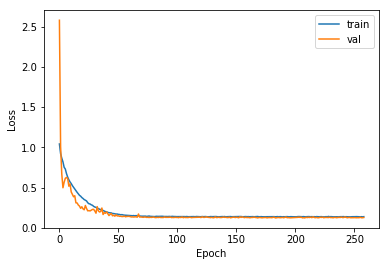

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'])

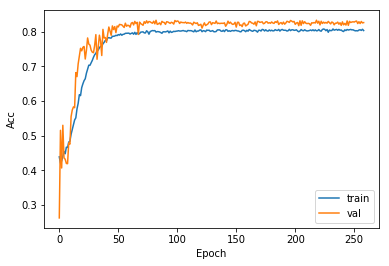

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.legend(['train','val'])

In [0]:
from keras.models import load_model
model.load_weights('/content/drive/My Drive/SSDL/Day3/Small_Unet_Pool_Aug/Weights/2small_Unet.h5')

In [0]:
a = np.reshape(X_test[3],(128,128))
b = np.reshape(y_test[3],(128,128))

c = np.copy(a)
d = np.copy(b)

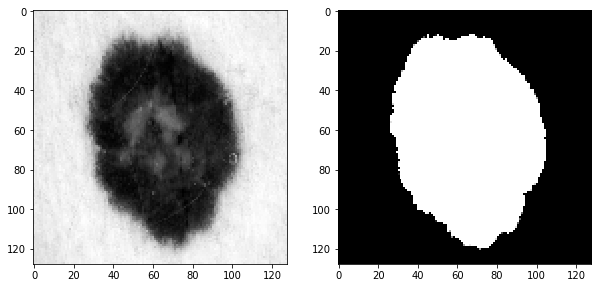

In [0]:
plt.figure(figsize=(10,10))
plt.subplot(121).imshow(a, 'gray')
plt.subplot(122).imshow(b,'gray')

In [0]:
testing_image = np.reshape(X_test[3], (1,128,128,1))

In [0]:
prediction = model.predict(testing_image)
prediction.shape
prediction = prediction.reshape((128,128))

-0.28777736
1.1110682


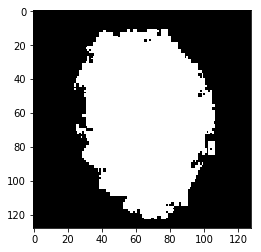

In [0]:
sample = prediction > 0.5
print(np.min(prediction))
print(np.max(prediction))
plt.imshow(sample, cmap = "gray")

Text(0.5, 0, 'PREDICTION')

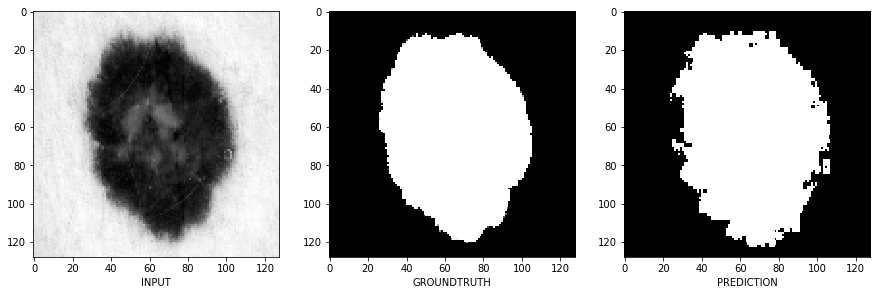

In [0]:
plt.figure(figsize=(15,15))

plt.subplot(131).imshow(c,'gray')
plt.xlabel('INPUT')

plt.subplot(132).imshow(d,'gray')
plt.xlabel('GROUNDTRUTH')

plt.subplot(133).imshow(sample,'gray')
plt.xlabel('PREDICTION')

In [0]:
train_pred = model.predict(X_train, batch_size=32)
train_result = np.zeros(train_pred.shape)
train_result[train_pred>0.5] = 1
train_result[train_pred<=0.5] = 0
dice = dc(train_result, y_train)
pre  = precision(train_result,y_train)
re   = recall(train_result,y_train)
print('Train dc: '  + str(dice))
print('Train pre: ' + str(pre))
print('Train re: '  + str(re))

Train dc: 0.7422563833622865
Train pre: 0.9251179606593541
Train re: 0.6197539648873137


In [0]:
test_pred = model.predict(X_test, batch_size=32)
test_result = np.zeros(test_pred.shape)
test_result[test_pred>0.5] = 1
test_result[test_pred<=0.5] = 0
dice = dc(test_result, y_test)
pre  = precision(test_result,y_test)
re   = recall(test_result,y_test)
print('Test dc: '  + str(dice))
print('Test pre: ' + str(pre))
print('Test re: '  + str(re))

Test dc: 0.533624155782724
Test pre: 0.8283429876805091
Test re: 0.3935881532020468
